# Library


In [1]:
import pandas as pd
import numpy as np
import os
from tqdm import tqdm
from datetime import datetime
from glob import glob

In [2]:
# 소수점 옵션
pd.options.display.float_format = '{:.2f}'.format
# pd.reset_option('display.float_format')

In [43]:
import matplotlib.pyplot as plt

In [44]:
import platform
from matplotlib import font_manager, rc

# 한글 폰트 지정
path = "C:/Windows/Fonts/malgun.ttf"
if platform.system() == "Windows":
    font_name = font_manager.FontProperties(fname=path).get_name()
    rc('font', family=font_name)
elif platform.system()=="Darwin":
    rc('font', family='AppleGothic')
else:
    print("Unknown System")

In [45]:
# 음수 표현
plt.rcParams['axes.unicode_minus'] = False

# fold path

In [3]:
raw_fold = 'D:/data/big2/BD1/raw'
ods_fold = 'D:/data/big2/ODS'
sample_fold = 'D:/data/big2/BD1/sample'
analysis_fold = 'D:/data/big2/BD1/an'

# Load

## 4등급 경유 result&정기&정밀(최신검사)

In [4]:
# about 20.4s
name = 'result(4등급_경유)&정기&정밀(최신검사)(2023.03.31)'
file_name = f'{name}.csv'
df = pd.read_csv(os.path.join(raw_fold, file_name), low_memory=False, encoding='cp949')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1148315 entries, 0 to 1148314
Data columns (total 59 columns):
 #   Column     Non-Null Count    Dtype  
---  ------     --------------    -----  
 0   차대번호       1148315 non-null  object 
 1   차량번호       1148315 non-null  object 
 2   제원관리번호     1148315 non-null  object 
 3   차종         1148315 non-null  object 
 4   용도         1148315 non-null  object 
 5   최초등록일      1148315 non-null  int64  
 6   연식         1148315 non-null  int64  
 7   제작일자       1148313 non-null  float64
 8   검사유효일      1148312 non-null  float64
 9   배출가스인증번호   1141202 non-null  object 
 10  등급         1148315 non-null  int64  
 11  차명         1148315 non-null  object 
 12  차종분류       1148315 non-null  object 
 13  차종유형       1148315 non-null  object 
 14  자동차형식      1148314 non-null  object 
 15  제작사명       1148297 non-null  object 
 16  연료         1148315 non-null  object 
 17  엔진형식       1148315 non-null  object 
 18  총중량        1148315 non-null  int64  
 19  

In [5]:
df.columns

Index(['차대번호', '차량번호', '제원관리번호', '차종', '용도', '최초등록일', '연식', '제작일자', '검사유효일',
       '배출가스인증번호', '등급', '차명', '차종분류', '차종유형', '자동차형식', '제작사명', '연료', '엔진형식',
       '총중량', '적재중량', '엔진출력', '배기량', '법정동코드', '시도명', '시군구명', '소유자구분', '말소여부',
       '일치유무', '배인번호_수정', '등급_수정', 'DPF유무_수정', '주행거리', '차량연식', '검사방법', '검사일자',
       '검사종류', '검사판정시각', '검사판정', '산소값', '이산화탄소값', '무부하매연판정1', '무부하매연판정2',
       '무부하매연판정3', '무부하매연판정4', '무부하매연판정5', '무부하매연판정6', '무부하매연허용치1',
       '무부하매연허용치2', '무부하매연허용치3', '무부하매연허용치4', '무부하매연허용치5', '무부하매연허용치6',
       '무부하매연측정치1', '무부하매연측정치2', '무부하매연측정치3', '무부하매연측정치4', '무부하매연측정치5',
       '무부하매연측정치6', '정기정밀'],
      dtype='object')

In [6]:
df['등급_수정'].value_counts(dropna=False)

4    1148315
Name: 등급_수정, dtype: int64

In [7]:
df['연료'].value_counts(dropna=False)

경유    1148315
Name: 연료, dtype: int64

In [8]:
df['말소여부'].value_counts(dropna=False)

N    1148315
Name: 말소여부, dtype: int64

In [9]:
df[['배인번호_수정', '등급_수정', 'DPF유무_수정']].isnull().sum()

배인번호_수정     0
등급_수정       0
DPF유무_수정    0
dtype: int64

In [10]:
df['검사방법'].unique()

array(['무부하검사(급가속)', nan, '부하검사(KD-147)', '부하검사(LUG DOWN)',
       '부하검사(ASM-Idling)', '무부하검사(정지가동)'], dtype=object)

In [11]:
df['검사종류'].unique()

array(['종합검사', nan, '재검사(2부재검사)', '정기검사', '정기(경과)검사', '종합검사(경과)',
       '재검사(1부재검사)', '2부재검사(종합)', '1부재검사(종합)'], dtype=object)

In [13]:
df[['배출가스인증번호', '제원관리번호']].head()

,배출가스인증번호,제원관리번호
0,4MY-AD-20,02420000100031305
1,4MY-AD-20,02420000100031305
2,4MY-AD-20,02420000100031305
3,4MY-AD-20,02420000100031305
4,4MY-AD-20,02420000100031305


## 통계(검사종류별, 검사방법별, 측정치 개수)

In [22]:
col = '무부하매연측정치'
agg = 'count'
statics = df.groupby(['검사종류', '검사방법']).agg({f'{col}1':agg, f'{col}2':agg, f'{col}3':agg, f'{col}4':agg, f'{col}5':agg, f'{col}6':agg})
statics

무부하매연측정치1  무부하매연측정치2  무부하매연측정치3  무부하매연측정치4  \
검사종류       검사방법                                                           
1부재검사(종합)  무부하검사(급가속)              707        707        333        333   
           부하검사(KD-147)          16768       6486       6486       6486   
           부하검사(LUG DOWN)         1171       1171       1171       1171   
2부재검사(종합)  무부하검사(급가속)             2587       2587        998        998   
           부하검사(KD-147)          77914      26469      26468      26468   
           부하검사(LUG DOWN)         6409       6409       6409       6409   
재검사(1부재검사) 무부하검사(급가속)            18140          0          0          0   
재검사(2부재검사) 무부하검사(급가속)            30943          0          0          0   
정기(경과)검사   무부하검사(급가속)            11248          0          0          0   
정기검사       무부하검사(급가속)           168781          0          0          0   
           무부하검사(정지가동)               2          2          2          0   
종합검사       무부하검사(급가속)            47338      47338      18994      18994   
           부하검사(ASM-Idling)          3          3          3          3   
           부하검사(KD-147)         640907     219338     219336     219336   
           부하검사(LUG DOWN)        30143      30143      30143      30143   
종합검사(경과)   무부하검사(급가속)             3496       3496       1100       1100   
           부하검사(KD-147)          51191      14433      14433      14433   
           부하검사(LUG DOWN)         3838       3838       3838       3838   

                             무부하매연측정치5  무부하매연측정치6  
검사종류       검사방법                                    
1부재검사(종합)  무부하검사(급가속)              333        333  
           부하검사(KD-147)           6486       6486  
           부하검사(LUG DOWN)         1171        338  
2부재검사(종합)  무부하검사(급가속)              998        998  
           부하검사(KD-147)          26468      26467  
           부하검사(LUG DOWN)         6409       1506  
재검사(1부재검사) 무부하검사(급가속)                0          0  
재검사(2부재검사) 무부하검사(급가속)                0          0  
정기(경과)검사   무부하검사(급가속)                0          0  
정기검사       무부하검사(급가속)                0          0  
           무부하검사(정지가동)               0          0  
종합검사       무부하검사(급가속)            18994      18994  
           부하검사(ASM-Idling)          3          3  
           부하검사(KD-147)         219336     219334  
           부하검사(LUG DOWN)        30143       8234  
종합검사(경과)   무부하검사(급가속)             1100       1100  
           부하검사(KD-147)          14433      14433  
           부하검사(LUG DOWN)         3838       1043

In [25]:
today_date = datetime.today().strftime("%Y.%m.%d_%p.%I.%M.%S")
today_date

'2023.03.30_AM.10.50.35'

### [출력] 통계

In [27]:
statics.to_excel(os.path.join(analysis_fold, f'통계 result(4등급_경유) 검사종류 검사방법별 측정치 개수({today_date}).xlsx'))

### 제원관리번호 오류 확인

In [13]:
df.loc[df['배출가스인증번호'] == '4MY-AD-20', '제원관리번호'].value_counts()

2420000100031300     29
Name: 제원관리번호, dtype: int64

# 전처리

## 차대번호 10자리 연식

In [14]:
df1 = df.copy()

In [15]:
df1['vin10'] = df1['차대번호'].str[9]

In [16]:
vin10_dict = {'J':1988, 'K':1989, 'L':1990, 'M':1991, 'N':1992, 'P':1993, 'R':1994, 'S':1995, 'T':1996, 'V':1997, 'W':1998, 'X':1999, 'Y':2000, '1':2001, '2':2002, '3':2003, '4':2004, '5':2005, '6':2006, '7':2007, '8':2008, '9':2009, 'A':2010, 'B':2011, 'C':2012, 'D':2013, 'E':2014, 'F':2015, 'G':2016, 'H':2017}

In [17]:
df1['vin10_year'] = df1['vin10'].map(vin10_dict, na_action='ignore')

## 배인번호 17자리 샘플

In [18]:
df2y = df1.loc[df1['차대번호'].str.len() == 17].reset_index(drop=True)
df2n = df1.loc[df1['차대번호'].str.len() != 17].reset_index(drop=True)
df2y.shape, df2n.shape

((1148306, 61), (9, 61))

### [출력] 샘플-배인번호17자리 아닌

In [167]:
# today_date = datetime.today().strftime("%Y.%m.%d_%p.%I.%M.%S")
# df2n.to_excel(os.path.join(sample_fold, f'통합_샘플_차대번호17자리아닌_{today_date}.xlsx'), index=False)

## 배인 연식과 연식 동일한 샘플

In [19]:
df3y = df2y.loc[df2y['vin10_year'] == df2y['연식']].reset_index(drop=True)
df3n = df2y.loc[df2y['vin10_year'] != df2y['연식']].reset_index(drop=True)
df3y.shape, df3n.shape

((1148246, 61), (60, 61))

### [출력] 샘플-배인연식 다른

In [20]:
# today_date = datetime.today().strftime("%Y.%m.%d_%p.%I.%M.%S")
# df3n.to_excel(os.path.join(sample_fold, f'통합_샘플_차대번호17자리_차량연식다른_{today_date}.xlsx'), index=False)

# [test] 배출가스 인증번호별 분석
- [해결] issue
    - 배인번호 없음 : 9MY-KM-14-22
        - 차명 : 쏘렌토
        - 등급변경 : 3 -> 4

## [로드] 배인번호 파일

In [21]:
# 4MY-AD-20
# 5MY-BK-14-07
# 6MY-BK-13-08
# 6MY-MK-14-02

# 5MY-HD-24-35
# 8MY-PA-14-03

In [142]:
test_df = pd.DataFrame()

In [143]:
emis_no = '4MY-AD-20'
gas_df = df1.loc[df1['배인번호_수정'] == emis_no]
gas_df.shape

(30, 61)

### 전처리
- 제거
    - 차대번호 17자리 아닌 샘플
    - 차대번호 10자리와 차량연식이 다른 샘플

#### [출력] 차대번호17자리 아닌 샘플

In [144]:
vin17y = gas_df[(gas_df['차대번호'].str.len() == 17)].reset_index(drop=True)
vin17n = gas_df[(gas_df['차대번호'].str.len() != 17)].reset_index(drop=True)
vin17y.shape, vin17n.shape

((30, 61), (0, 61))

In [145]:
# vin17n.to_excel(os.path.join(sample_fold, f'샘플_차대번호17자리아닌_{emis_no}.xlsx'), index=False)

#### [출력] 차대번호10자리 연도와 차량연식 다른 샘플

In [146]:
vin17y_vin10y = vin17y[vin17y['vin10_year'] == vin17y['연식']].reset_index(drop=True)
vin17y_vin10n = vin17y[vin17y['vin10_year'] != vin17y['연식']].reset_index(drop=True)
vin17y_vin10y.shape, vin17y_vin10n.shape

((30, 61), (0, 61))

In [147]:
# vin17y_vin10n.to_excel(os.path.join(sample_fold, f'샘플_차대번호17자리_차량연식다른_{emis_no}.xlsx'), index=False)

### 분석
- 제원관리번호별, 자동차형식별, 엔진형식별, 검사판정별 무부하매연측정치1 통계

In [148]:
vin17y_vin10y['무부하매연측정치1'].dtype

dtype('float64')

In [149]:
vin17y_vin10y['무부하매연측정치1'].isnull().sum()

3

In [150]:
def flat_cols(df):
    df.columns = ['/'.join(x) for x in df.columns.to_flat_index()]
    return df

In [151]:
vin17y_vin10y.columns

Index(['차대번호', '차량번호', '제원관리번호', '차종', '용도', '최초등록일', '연식', '제작일자', '검사유효일',
       '배출가스인증번호', '등급', '차명', '차종분류', '차종유형', '자동차형식', '제작사명', '연료', '엔진형식',
       '총중량', '적재중량', '엔진출력', '배기량', '법정동코드', '시도명', '시군구명', '소유자구분', '말소여부',
       '일치유무', '배인번호_수정', '등급_수정', 'DPF유무_수정', '주행거리', '차량연식', '검사방법', '검사일자',
       '검사종류', '검사판정시각', '검사판정', '산소값', '이산화탄소값', '무부하매연판정1', '무부하매연판정2',
       '무부하매연판정3', '무부하매연판정4', '무부하매연판정5', '무부하매연판정6', '무부하매연허용치1',
       '무부하매연허용치2', '무부하매연허용치3', '무부하매연허용치4', '무부하매연허용치5', '무부하매연허용치6',
       '무부하매연측정치1', '무부하매연측정치2', '무부하매연측정치3', '무부하매연측정치4', '무부하매연측정치5',
       '무부하매연측정치6', '정기정밀', 'vin10', 'vin10_year'],
      dtype='object')

In [152]:
vin17y_vin10y['검사종류'].unique()

array(['종합검사', nan, '재검사(2부재검사)', '정기검사', '정기(경과)검사', '종합검사(경과)'],
      dtype=object)

In [153]:
vin17y_vin10y['검사방법'].unique()

array(['무부하검사(급가속)', nan], dtype=object)

In [154]:
groupby_col1 = ['제작사명', '배인번호_수정', '제원관리번호', '자동차형식', '엔진형식', '검사종류', '검사방법', '검사판정']
g = vin17y_vin10y.groupby(groupby_col1).agg({'차대번호':'count', '무부하매연측정치1':['mean', 'min', 'max']}).pipe(flat_cols).round(2).reset_index()
g = g.rename(columns={'배인번호_수정':'배출가스인증번호', '차대번호/count':'대수', '무부하매연측정치1/mean':'mean', '무부하매연측정치1/min':'min', '무부하매연측정치1/max':'max'})

In [155]:
g

,제작사명,배출가스인증번호,제원관리번호,자동차형식,엔진형식,검사종류,검사방법,검사판정,대수,mean,min,max
0,아우디폭스바겐코리아(주),4MY-AD-20,2420000100031300,4F,BMK,재검사(2부재검사),무부하검사(급가속),Y,1,19.00,19.00,19.00
1,아우디폭스바겐코리아(주),4MY-AD-20,2420000100031300,4F,BMK,정기(경과)검사,무부하검사(급가속),Y,2,6.00,0.00,12.00
2,아우디폭스바겐코리아(주),4MY-AD-20,2420000100031300,4F,BMK,정기검사,무부하검사(급가속),N,1,21.00,21.00,21.00
3,아우디폭스바겐코리아(주),4MY-AD-20,2420000100031300,4F,BMK,정기검사,무부하검사(급가속),Y,2,23.00,20.00,26.00
4,아우디폭스바겐코리아(주),4MY-AD-20,2420000100031300,4F,BMK,종합검사,무부하검사(급가속),N,1,51.00,51.00,51.00
5,아우디폭스바겐코리아(주),4MY-AD-20,2420000100031300,4F,BMK,종합검사,무부하검사(급가속),Y,15,12.33,0.00,31.00
6,아우디폭스바겐코리아(주),4MY-AD-20,2420000100031300,4F,BMK,종합검사(경과),무부하검사(급가속),Y,4,15.00,11.00,17.00
7,자기인증면제차량,4MY-AD-20,31124022261309,4F,BMK,종합검사,무부하검사(급가속),Y,1,2.00,2.00,2.00


In [156]:
groupby_col2 = ['제작사명', '배출가스인증번호', '제원관리번호', '자동차형식', '엔진형식', '검사종류', '검사방법']
g.groupby(groupby_col2)['대수'].transform('sum')

0     1
1     2
2     3
3     3
4    16
5    16
6     4
7     1
Name: 대수, dtype: int64

In [157]:
g['합격률(%)'] = round(g['대수'] / g.groupby(groupby_col2)['대수'].transform('sum') * 100, 2)
g

,제작사명,배출가스인증번호,제원관리번호,자동차형식,엔진형식,검사종류,검사방법,검사판정,대수,mean,min,max,합격률(%)
0,아우디폭스바겐코리아(주),4MY-AD-20,2420000100031300,4F,BMK,재검사(2부재검사),무부하검사(급가속),Y,1,19.00,19.00,19.00,100.00
1,아우디폭스바겐코리아(주),4MY-AD-20,2420000100031300,4F,BMK,정기(경과)검사,무부하검사(급가속),Y,2,6.00,0.00,12.00,100.00
2,아우디폭스바겐코리아(주),4MY-AD-20,2420000100031300,4F,BMK,정기검사,무부하검사(급가속),N,1,21.00,21.00,21.00,33.33
3,아우디폭스바겐코리아(주),4MY-AD-20,2420000100031300,4F,BMK,정기검사,무부하검사(급가속),Y,2,23.00,20.00,26.00,66.67
4,아우디폭스바겐코리아(주),4MY-AD-20,2420000100031300,4F,BMK,종합검사,무부하검사(급가속),N,1,51.00,51.00,51.00,6.25
5,아우디폭스바겐코리아(주),4MY-AD-20,2420000100031300,4F,BMK,종합검사,무부하검사(급가속),Y,15,12.33,0.00,31.00,93.75
6,아우디폭스바겐코리아(주),4MY-AD-20,2420000100031300,4F,BMK,종합검사(경과),무부하검사(급가속),Y,4,15.00,11.00,17.00,100.00
7,자기인증면제차량,4MY-AD-20,31124022261309,4F,BMK,종합검사,무부하검사(급가속),Y,1,2.00,2.00,2.00,100.00


In [158]:
test_df = pd.concat([test_df, g], ignore_index=True)

In [159]:
test_df

,제작사명,배출가스인증번호,제원관리번호,자동차형식,엔진형식,검사종류,검사방법,검사판정,대수,mean,min,max,합격률(%)
0,아우디폭스바겐코리아(주),4MY-AD-20,2420000100031300,4F,BMK,재검사(2부재검사),무부하검사(급가속),Y,1,19.00,19.00,19.00,100.00
1,아우디폭스바겐코리아(주),4MY-AD-20,2420000100031300,4F,BMK,정기(경과)검사,무부하검사(급가속),Y,2,6.00,0.00,12.00,100.00
2,아우디폭스바겐코리아(주),4MY-AD-20,2420000100031300,4F,BMK,정기검사,무부하검사(급가속),N,1,21.00,21.00,21.00,33.33
3,아우디폭스바겐코리아(주),4MY-AD-20,2420000100031300,4F,BMK,정기검사,무부하검사(급가속),Y,2,23.00,20.00,26.00,66.67
4,아우디폭스바겐코리아(주),4MY-AD-20,2420000100031300,4F,BMK,종합검사,무부하검사(급가속),N,1,51.00,51.00,51.00,6.25
5,아우디폭스바겐코리아(주),4MY-AD-20,2420000100031300,4F,BMK,종합검사,무부하검사(급가속),Y,15,12.33,0.00,31.00,93.75
6,아우디폭스바겐코리아(주),4MY-AD-20,2420000100031300,4F,BMK,종합검사(경과),무부하검사(급가속),Y,4,15.00,11.00,17.00,100.00
7,자기인증면제차량,4MY-AD-20,31124022261309,4F,BMK,종합검사,무부하검사(급가속),Y,1,2.00,2.00,2.00,100.00


# 배인번호별 분석

In [22]:
def flat_cols(df):
    df.columns = ['/'.join(x) for x in df.columns.to_flat_index()]
    return df

In [23]:
# about 11.9s
# 최적화 24m 51s -> 11.9s 시간 99% 절감, 처리 속도 124배 증가
total_g_df = pd.DataFrame()
groupby_col1 = ['제작사명', '배인번호_수정', '제원관리번호', '자동차형식', '엔진형식', '검사종류', '검사방법', '검사판정']
groupby_col2 = ['제작사명', '배출가스인증번호', '제원관리번호', '자동차형식', '엔진형식', '검사종류', '검사방법']
for one in tqdm(df3y['배인번호_수정'].unique()):
    # 배인번호별 df
    gas_df = df3y.loc[df3y['배인번호_수정'] == str(one)].reset_index(drop=True)

    if gas_df.shape[0] != 0:
        # 제번별, 차형식별, 엔진형식별, 검사판정별 무부하매연측정치1 통계
        g = gas_df.groupby(groupby_col1).agg({'차대번호':'count', '무부하매연측정치1':['mean', 'min', 'max']}).pipe(flat_cols).round(2).reset_index()
        g = g.rename(columns={'배인번호_수정':'배출가스인증번호', '차대번호/count':'대수', '무부하매연측정치1/mean':'mean', '무부하매연측정치1/min':'min', '무부하매연측정치1/max':'max'})
        # 하나의 배인번호에서 제번별 엔진형식별 비율 계산
        g['합격률(%)'] = round(g['대수'] / g.groupby(groupby_col2)['대수'].transform('sum') * 100, 2)
        # 종합 - 통계
        total_g_df = pd.concat([total_g_df, g], ignore_index=True)
    else:
        print(f'오류 배인번호 : {one}')
        pass

100%|██████████| 140/140 [00:11<00:00, 11.85it/s]


In [24]:
total_g_df.head()

,제작사명,배출가스인증번호,제원관리번호,자동차형식,엔진형식,검사종류,검사방법,검사판정,대수,mean,min,max,합격률(%)
0,아우디폭스바겐코리아(주),4MY-AD-20,02420000100031305,4F,BMK,재검사(2부재검사),무부하검사(급가속),Y,1,19.00,19.00,19.00,100.00
1,아우디폭스바겐코리아(주),4MY-AD-20,02420000100031305,4F,BMK,정기(경과)검사,무부하검사(급가속),Y,2,6.00,0.00,12.00,100.00
2,아우디폭스바겐코리아(주),4MY-AD-20,02420000100031305,4F,BMK,정기검사,무부하검사(급가속),N,1,21.00,21.00,21.00,33.33
3,아우디폭스바겐코리아(주),4MY-AD-20,02420000100031305,4F,BMK,정기검사,무부하검사(급가속),Y,2,23.00,20.00,26.00,66.67
4,아우디폭스바겐코리아(주),4MY-AD-20,02420000100031305,4F,BMK,종합검사,무부하검사(급가속),N,1,51.00,51.00,51.00,6.25


In [25]:
total_g_df.shape

(28212, 13)

In [163]:
total_g_df1 = total_g_df.loc[total_g_df['배출가스인증번호'] != '확인불가']
total_g_df1.shape

(25301, 13)

## [출력] 통계 배인번호별 매연값

In [164]:
# about 2s
today_date = datetime.today().strftime("%Y.%m.%d_%p.%I.%M.%S")
total_g_df1.to_excel(os.path.join(analysis_fold, f'통계_배인번호별_매연_{today_date}.xlsx'), index=False)

## 데이터 확인

In [165]:
df3y.shape

(1148246, 61)

In [166]:
total_g_df1['대수'].sum()

1114000

In [108]:
df3y[df3y['배인번호_수정'] == '확인불가'].shape

(6648, 61)

In [109]:
df2n[df2n['배인번호_수정'] == '확인불가'].shape

(0, 61)

In [110]:
df3n[df3n['배인번호_수정'] == '확인불가'].shape

(8, 61)

In [111]:
df[df['배인번호_수정'] == '확인불가'].shape

(6656, 59)

# 시각화

In [26]:
df.columns

Index(['차대번호', '차량번호', '제원관리번호', '차종', '용도', '최초등록일', '연식', '제작일자', '검사유효일',
       '배출가스인증번호', '등급', '차명', '차종분류', '차종유형', '자동차형식', '제작사명', '연료', '엔진형식',
       '총중량', '적재중량', '엔진출력', '배기량', '법정동코드', '시도명', '시군구명', '소유자구분', '말소여부',
       '일치유무', '배인번호_수정', '등급_수정', 'DPF유무_수정', '주행거리', '차량연식', '검사방법', '검사일자',
       '검사종류', '검사판정시각', '검사판정', '산소값', '이산화탄소값', '무부하매연판정1', '무부하매연판정2',
       '무부하매연판정3', '무부하매연판정4', '무부하매연판정5', '무부하매연판정6', '무부하매연허용치1',
       '무부하매연허용치2', '무부하매연허용치3', '무부하매연허용치4', '무부하매연허용치5', '무부하매연허용치6',
       '무부하매연측정치1', '무부하매연측정치2', '무부하매연측정치3', '무부하매연측정치4', '무부하매연측정치5',
       '무부하매연측정치6', '정기정밀'],
      dtype='object')

In [29]:
df['차종'].unique()

array(['승용', '특수', '승합', '화물'], dtype=object)

In [30]:
df['용도'].unique()

array(['자가용', '관용', '영업용'], dtype=object)

In [61]:
temp = df.groupby('용도')['차대번호'].count().reset_index()
temp

,용도,차대번호
0,관용,4813
1,영업용,36034
2,자가용,1107468


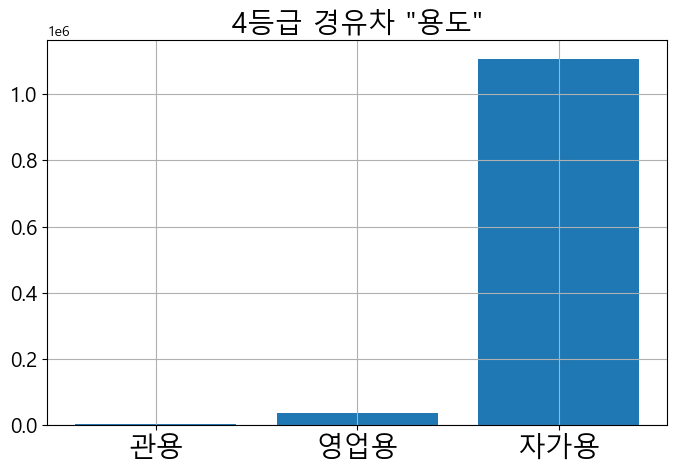

In [62]:
x = temp['용도'].to_list()
y = temp['차대번호'].to_list()
plt.figure(figsize=(8, 5))
plt.xticks(fontsize=20)
plt.yticks(fontsize=15)
plt.grid(True, zorder=1)
plt.title('4등급 경유차 "용도"', fontdict={'fontsize':20}, zorder=10)
plt.bar(x, y);

In [65]:
x

['관용', '영업용', '자가용']

In [66]:
y

[4813, 36034, 1107468]

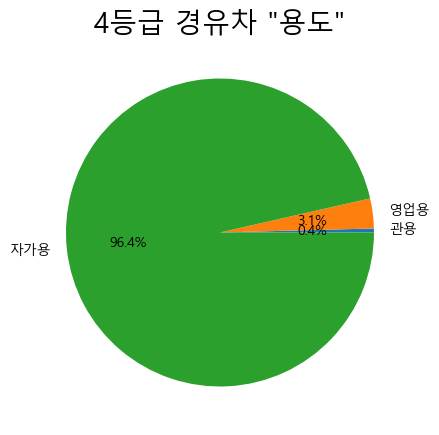

In [82]:
plt.figure(figsize=(8, 5))
plt.title('4등급 경유차 "용도"', fontdict={'fontsize':20}, zorder=10)
plt.pie(y, labels=x, autopct='%.1f%%');

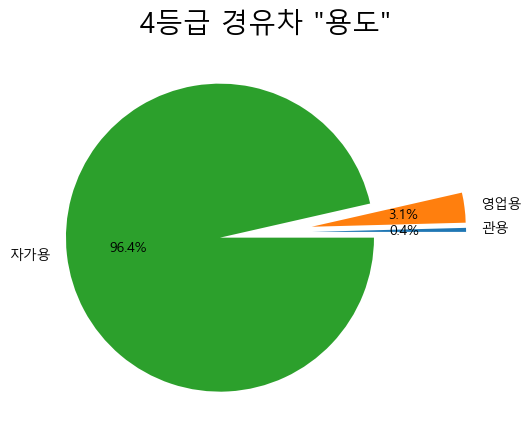

In [81]:
explode = [0.3, 0.3, 0.3]
plt.figure(figsize=(8, 5))
plt.title('4등급 경유차 "용도"', fontdict={'fontsize':20}, zorder=10)
plt.pie(y, labels=x, autopct='%.1f%%', explode=explode);

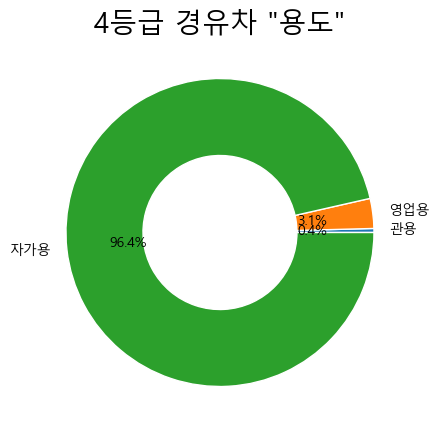

In [83]:
wedgeprops={'width': 0.5, 'edgecolor': 'w', 'linewidth': 1}
plt.figure(figsize=(8, 5))
plt.title('4등급 경유차 "용도"', fontdict={'fontsize':20}, zorder=10)
plt.pie(y, labels=x, autopct='%.1f%%', wedgeprops=wedgeprops);

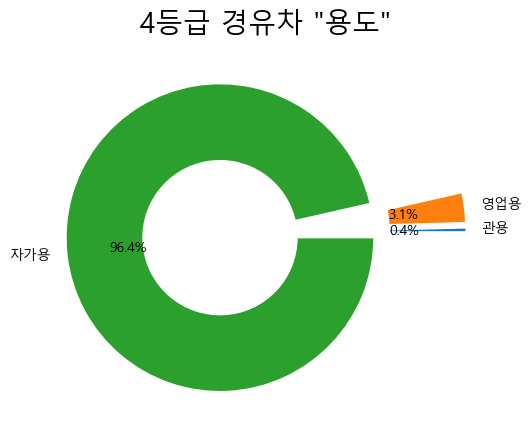

In [80]:
explode = [0.3, 0.3, 0.3]
wedgeprops={'width': 0.5, 'edgecolor': 'w', 'linewidth': 1}
plt.figure(figsize=(8, 5))
plt.title('4등급 경유차 "용도"', fontdict={'fontsize':20}, zorder=10)
plt.pie(y, labels=x, autopct='%.1f%%', explode=explode, wedgeprops=wedgeprops);

In [85]:
temp = df.groupby('차종')['차대번호'].count().reset_index()
temp

,차종,차대번호
0,승용,524038
1,승합,132524
2,특수,6446
3,화물,485307


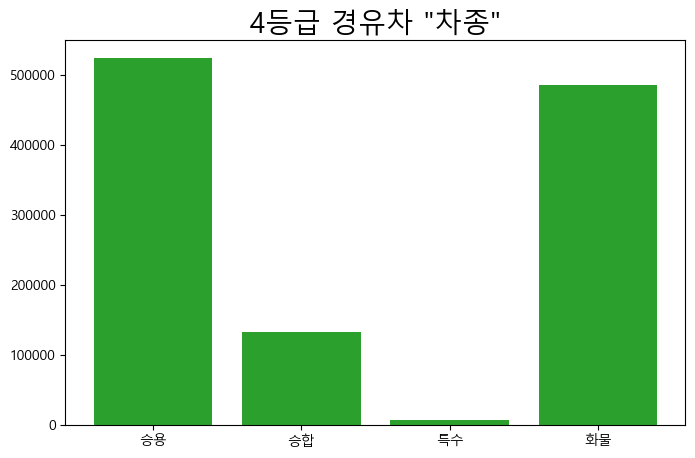

In [90]:
x = temp['차종'].to_list()
y = temp['차대번호'].to_list()
plt.figure(figsize=(8, 5))
plt.title('4등급 경유차 "차종"', fontdict={'fontsize':20}, zorder=10)
plt.bar(x, y, color='C2');

# code end